In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Données du problème

In [2]:
# === Conditions initiale === #
# x0 :  biomasse initiale
# y0 : concentration polluant dans le réacteur
# z0 : concentration dans le lac
# Q : débit entrée/sortie d'eau entre lac et bioréacteur
# mu : loi de croissance de la biomasse dans le bioréacteur
# epsilon : rapport des volumes du lac et du bioréacteur

# Définition des fonctions utiles

In [3]:
# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Implémentation de la méthode RK4 ===
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2)
        k4 = f(t[i] + dt, y[i] + dt * k3)
        y[i+1] = y[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Cas $\epsilon = 0$

# Point critique 1 : $A = \begin{pmatrix} 0 \\ z0 \\ z0 \end{pmatrix} $

## Cas 1 : $\mu z_0 < Q$ -> test stabilité

point critique =  [4.43102659e-07 4.99999956e+00 5.00000000e+00]


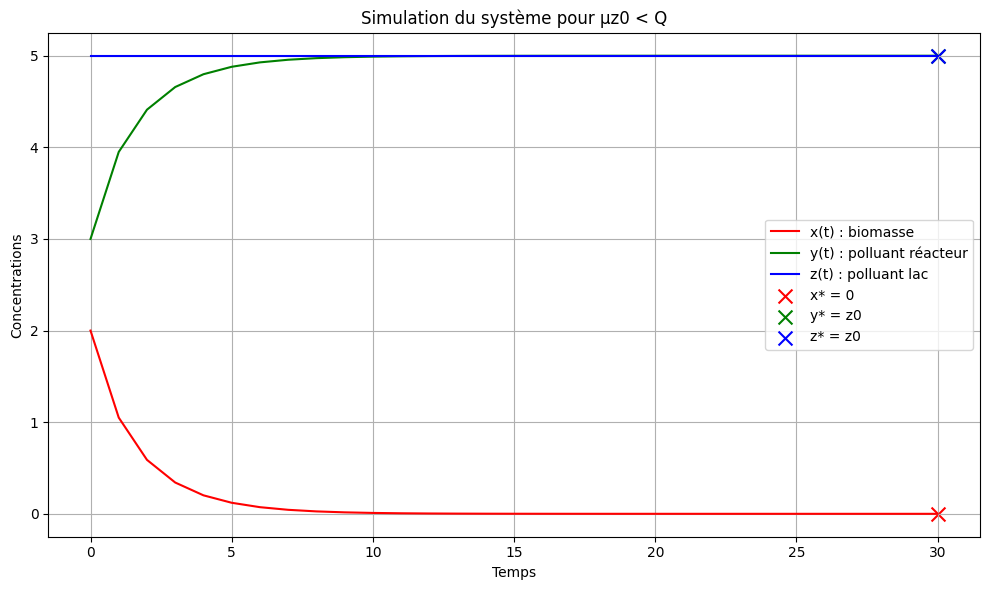

In [4]:
# === Paramètres du modèle === #
mu = 0.1
Q = 1
epsilon = 0

# === Paramètres de simulation === #
t_min = 0
t_max = 30
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0 , color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, z0, color='g', s = 100, marker='x', label = "y* = z0")
plt.scatter(t_max, z0, color='b', s = 100, marker='x', label = "z* = z0")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 < Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point A est stable pour $\mu z_0 < Q$.

## Cas 2 : $\mu z_0 = Q$ -> test stabilité

point critique =  [0.01652895 4.98347105 5.        ]


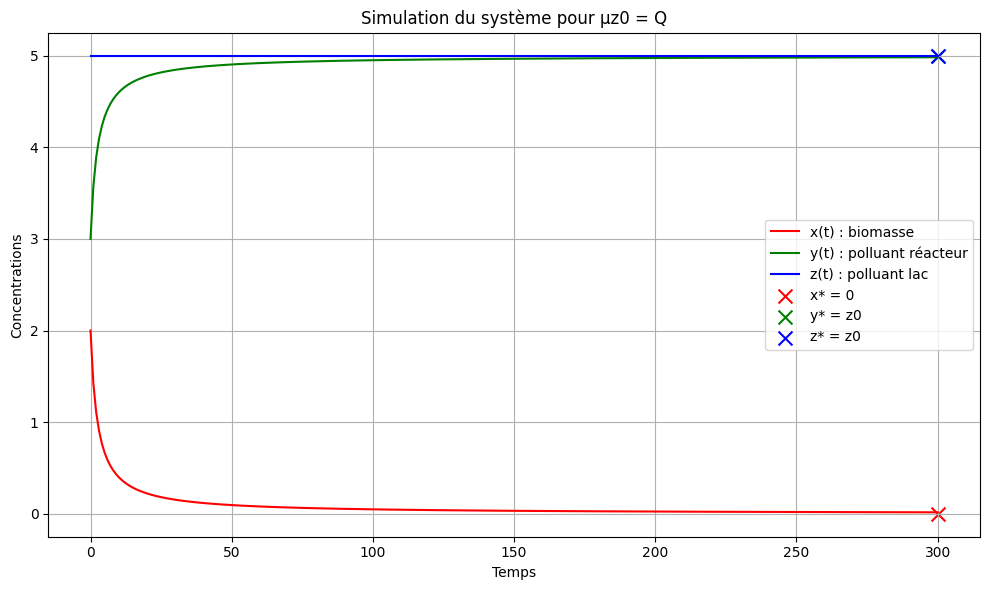

In [5]:
# === Paramètres du modèle === #
mu = 0.2
Q = 1
epsilon = 0

# === Paramètres de simulation === #
t_min = 0
t_max = 300
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0 , color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, z0, color='g', s = 100, marker='x', label = "y* = z0")
plt.scatter(t_max, z0, color='b', s = 100, marker='x', label = "z* = z0")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 = Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point A est stable pour $\mu z_0 = Q$.

## Cas 3 : $\mu z_0 > Q$ -> test stabilité

point critique =  [2.99340887 2.00659113 5.        ]


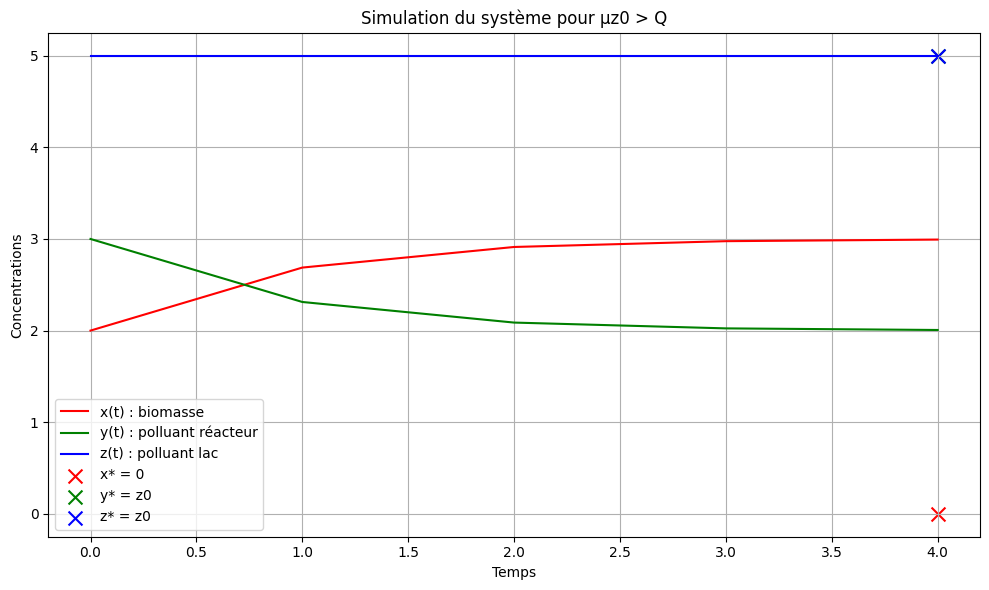

In [6]:
# === Paramètres du modèle === #
mu = 0.5
Q = 1
epsilon = 0

# === Paramètres de simulation === #
t_min = 0
t_max = 4
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0 , color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, z0, color='g', s = 100, marker='x', label = "y* = z0")
plt.scatter(t_max, z0, color='b', s = 100, marker='x', label = "z* = z0")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 > Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point A n'est pas stable pour $\mu z_0 > Q$. Testons l'instabilité du point pour $\mu z_0 > Q$.

## Cas 3 : $\mu z_0 > Q$ -> test instabilité

point critique =  [0. 5. 5.]


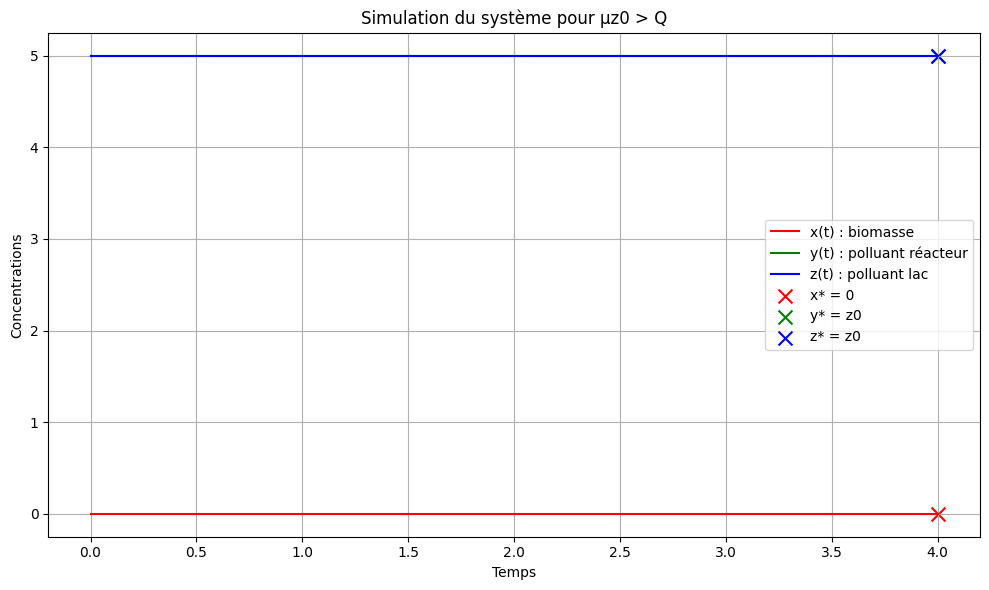

In [7]:
# === Paramètres du modèle === #
mu = 0.5
Q = 1
epsilon = 0

# === Paramètres de simulation === #
t_min = 0
t_max = 4
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 0
y0 = 5
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0 , color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, z0, color='g', s = 100, marker='x', label = "y* = z0")
plt.scatter(t_max, z0, color='b', s = 100, marker='x', label = "z* = z0")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 > Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point A n'est pas non plus instable pour $\mu z_0 > Q$, il est donc marginal pour $\mu z_0 > Q$.

# Point critique 2 : $B = \begin{pmatrix} z0 - Q/\mu \\ Q/\mu \\ z0 \end{pmatrix} $

## Cas 1 : $\mu z_0 > Q$ -> test stabilité

point critique =  [2.99340887 2.00659113 5.        ]


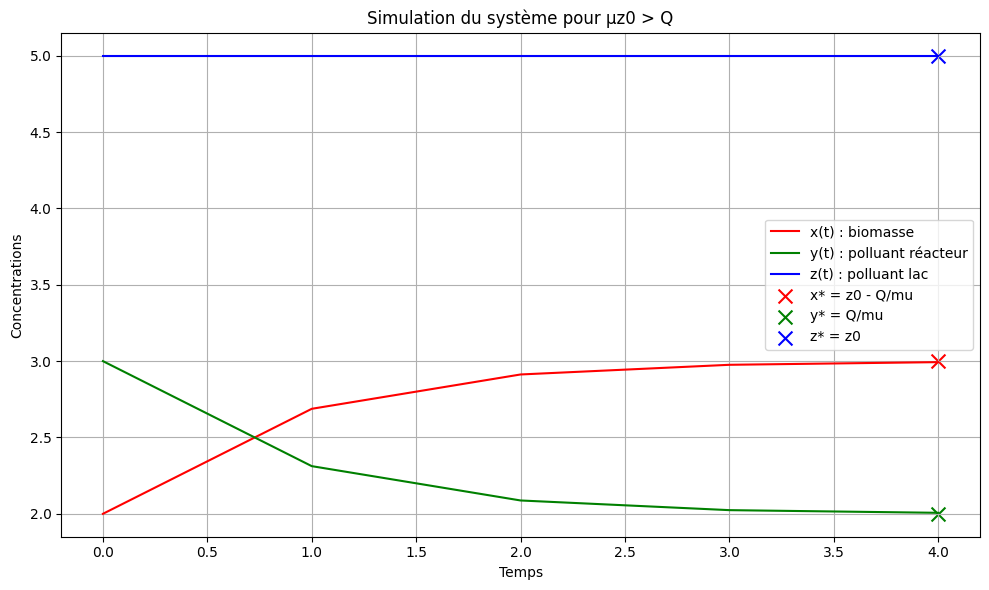

In [8]:
# === Paramètres du modèle === #
mu = 0.5
Q = 1
epsilon = 0

# === Paramètres de simulation === #
t_min = 0
t_max = 4
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, z0 - Q/mu , color='r', s = 100, marker='x', label = "x* = z0 - Q/mu")
plt.scatter(t_max, Q/mu, color='g', s = 100, marker='x', label = "y* = Q/mu")
plt.scatter(t_max, z0, color='b', s = 100, marker='x', label = "z* = z0")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 > Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point B est stable pour $\mu z_0 > Q$.

## Cas 2 : $\mu z_0 = Q$ -> test stabilité

point critique =  [0.01652895 4.98347105 5.        ]


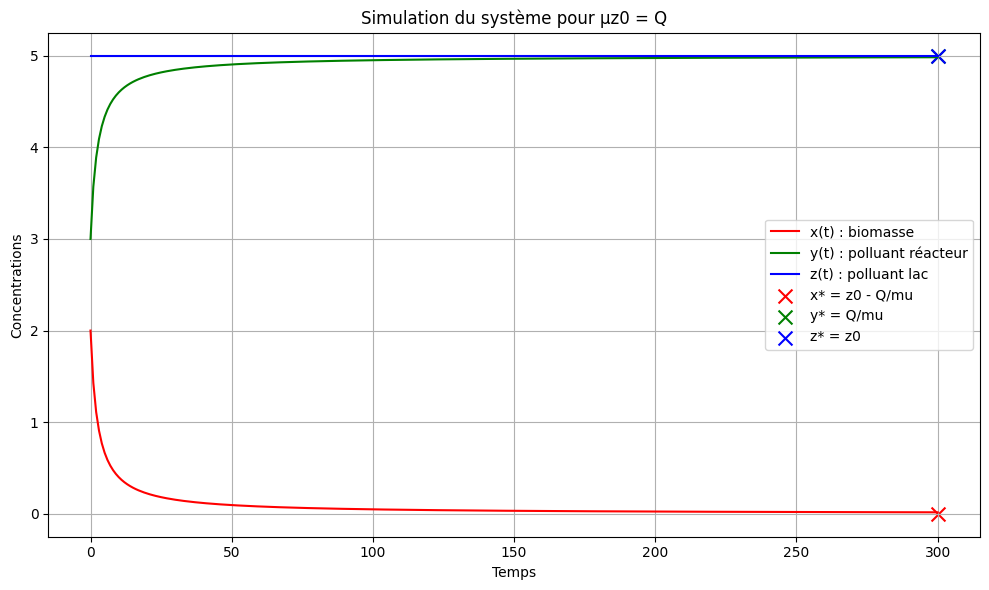

In [9]:
# === Paramètres du modèle === #
mu = 0.2
Q = 1
epsilon = 0

# === Paramètres de simulation === #
t_min = 0
t_max = 300
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, z0 - Q/mu , color='r', s = 100, marker='x', label = "x* = z0 - Q/mu")
plt.scatter(t_max, Q/mu, color='g', s = 100, marker='x', label = "y* = Q/mu")
plt.scatter(t_max, z0, color='b', s = 100, marker='x', label = "z* = z0")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 = Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point B est stable pour $\mu z_0 = Q$.

# Cas $\epsilon > 0$

# Point critique : $C = \begin{pmatrix} 0 \\ y^* \\ y^* \end{pmatrix} $

## Cas 1 : $\mu y^* < Q$ -> test stabilité

point critique =  [1.97251273e-07 4.70002318e+00 4.70002334e+00]


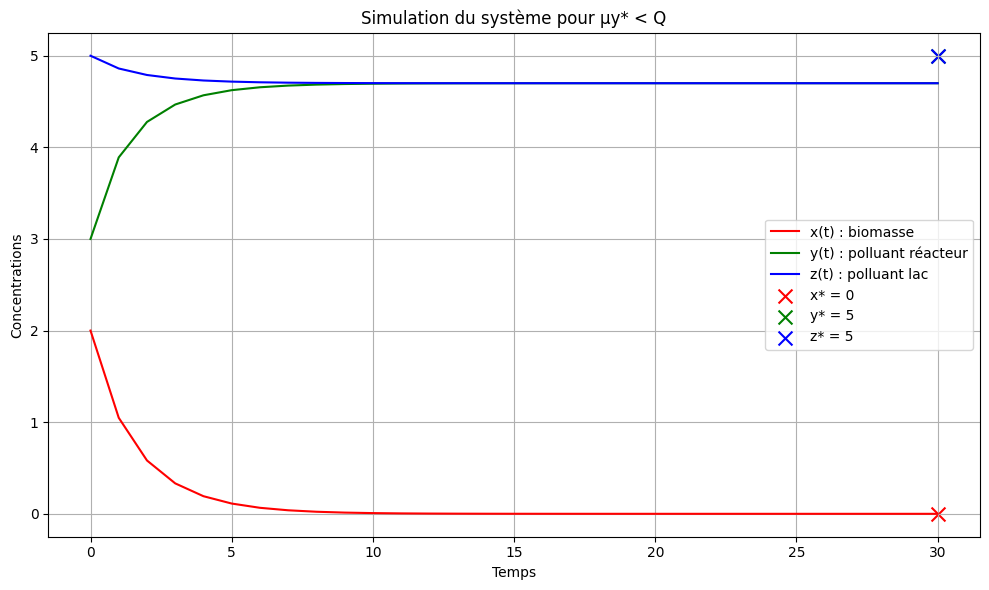

In [30]:
# === Paramètres du modèle === #
mu = 0.1
Q = 1
epsilon = 0.1

# === Paramètres de simulation === #
t_min = 0
t_max = 30
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0, color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, 5, color='g', s = 100, marker='x', label = "y* = 5")
plt.scatter(t_max, 5, color='b', s = 100, marker='x', label = "z* = 5")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy* < Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point C est stable pour $\mu y^* < Q$. On a maintenant une valeur plus précise de $y^* = 4.7$.

## Cas 2 : $\mu y^* = Q$ -> test stabilité

point critique =  [0.01989418 4.08121233 4.09905175]


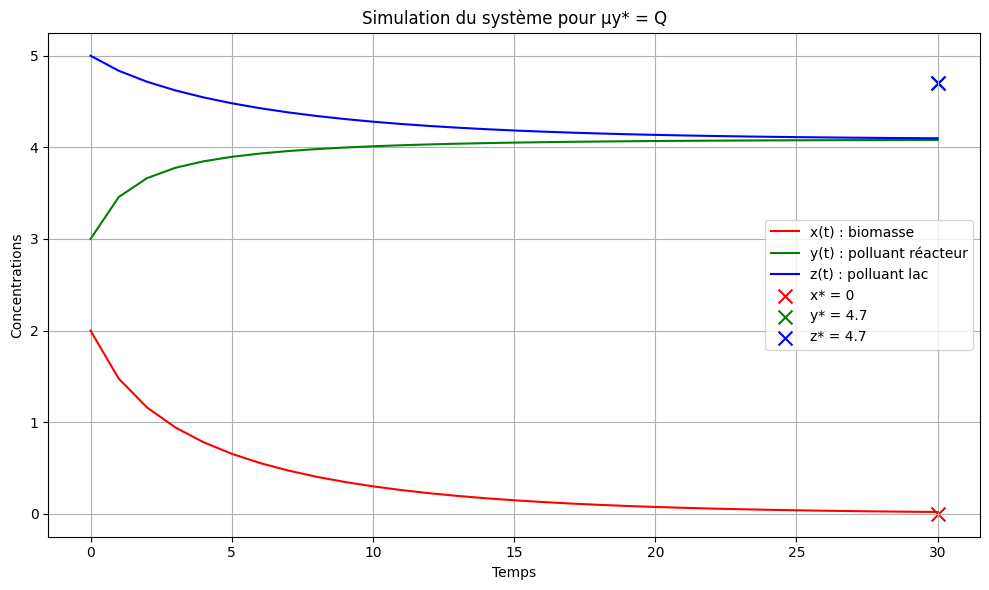

In [11]:
# === Paramètres du modèle === #
mu = 1/4.7
Q = 1
epsilon = 0.1

# === Paramètres de simulation === #
t_min = 0
t_max = 30
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution[t_max])

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0, color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, 4.7, color='g', s = 100, marker='x', label = "y* = 4.7")
plt.scatter(t_max, 4.7, color='b', s = 100, marker='x', label = "z* = 4.7")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy* = Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point C est stable pour $\mu y^* = Q$, mais il tend vers un autre point $y^*$ que celui déterminé précédemment.

## Cas 3 : $\mu y^* > Q$ -> test stabilité

point critique =  [[ 2.00000000e+000  3.00000000e+000  5.00000000e+000]
 [ 2.62579519e+000  2.30737668e+000  4.74050570e+000]
 [-2.63070561e+000  7.39052007e+000  4.60162443e+000]
 [-1.67611485e+008  1.67611492e+008  4.82485646e+002]
 [-4.48744925e+128  4.48744925e+128  7.73515719e+062]
 [             nan              nan              nan]]


C:\Users\pmarg\AppData\Local\Temp\ipykernel_3164\2334401159.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dx = mu * x * y - Q * x
C:\Users\pmarg\AppData\Local\Temp\ipykernel_3164\2334401159.py:14: RuntimeWarning: overflow encountered in scalar multiply
  dy = -mu * x * y + Q * (z - y)
C:\Users\pmarg\AppData\Local\Temp\ipykernel_3164\2334401159.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  dx = mu * x * y - Q * x
C:\Users\pmarg\AppData\Local\Temp\ipykernel_3164\2334401159.py:14: RuntimeWarning: invalid value encountered in scalar add
  dy = -mu * x * y + Q * (z - y)


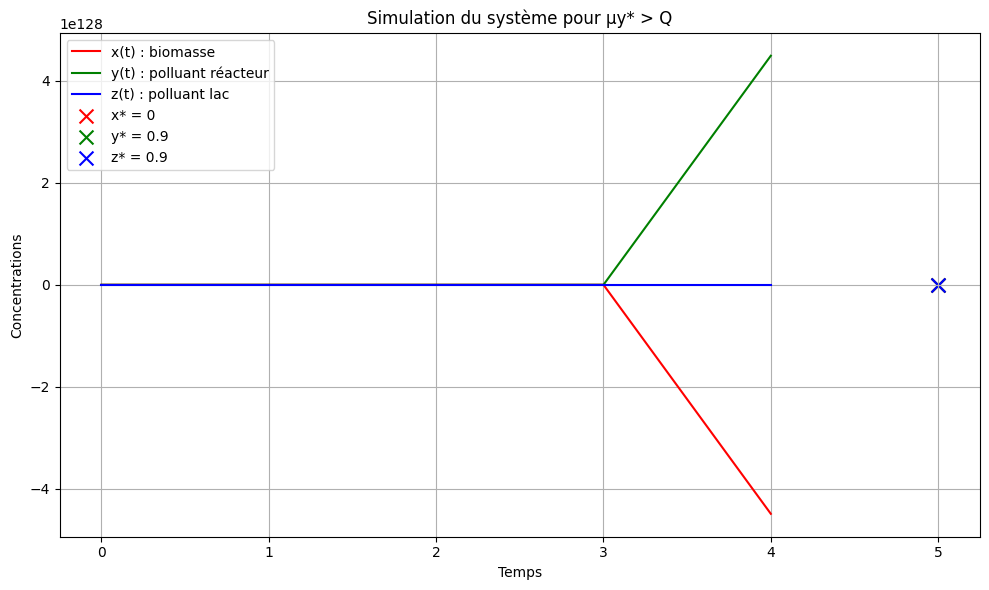

In [24]:
# === Paramètres du modèle === #
mu = 1.25
Q = 1
epsilon = 0.1

# === Paramètres de simulation === #
t_min = 0
t_max = 5
pas = 1
t = np.arange(start = t_min, stop = t_max + 1, step = pas)

# === Conditions initiales === #
x0 = 2
y0 = 3
z0 = 5
initial_state = np.array([x0, y0, z0])

# === Simulation === #
solution = rk4(system, initial_state, t)
print("point critique = ", solution)

# === Tracé des résultats === #
plt.figure(figsize=(10, 6))
# Courbes
plt.plot(t, solution[:, 0], "r", label = 'x(t) : biomasse')
plt.plot(t, solution[:, 1], "g", label = 'y(t) : polluant réacteur')
plt.plot(t, solution[:, 2], "b", label = 'z(t) : polluant lac')
# Point critique
plt.scatter(t_max, 0, color='r', s = 100, marker='x', label = "x* = 0")
plt.scatter(t_max, 0.9, color='g', s = 100, marker='x', label = "y* = 0.9")
plt.scatter(t_max, 0.9, color='b', s = 100, marker='x', label = "z* = 0.9")
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy* > Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Le point C n'est pas stable pour $\mu y^* > Q$, il ets même instable car il diverge.

# BROUILLON

Le système se comporte comme étant stable malgré l'existence d'un point critique marginal. 

### Clarification sur le point critique B = (-5, 10, 5)

1. **Nature mathématique vs physique** :
   - Le point B est bien une solution *mathématique* des équations d'équilibre, mais il est **non physique** (x = -5 < 0 impossible pour une concentration).
   - Dans l'espace des phases complet (incluant les valeurs négatives), ce point aurait effectivement un comportement marginal, mais le domaine physique (x ≥ 0) le rend inaccessible.

2. **Analyse de stabilité linéaire autour de B** :
   - Si on force l'analyse mathématique autour de B = (-5,10,5) :
     - Jacobienne :  
       $$
       J = \begin{pmatrix}
       0.1×10 - 1 & 0.1×(-5) \\
       -0.1×10 & -0.1×(-5) - 1
       \end{pmatrix} = \begin{pmatrix}
       0 & -0.5 \\
       -1 & 0.5
       \end{pmatrix}
       $$
     - Valeurs propres : λ = 0.25 ± 0.66i (partie réelle positive) → **Instable en spirale**.
   - Cela explique pourquoi même en partant très proche de B (si on autorisait x < 0), les trajectoires s'en éloigneraient.

3. **Pourquoi la trajectoire neutre n'apparaît pas** :
   - Une trajectoire "neutre" existerait si le système avait :
     - Des valeurs propres purement imaginaires (centre marginal), *et*
     - Une condition initiale exactement sur une orbite périodique.
   - Ici, même si B avait été marginal (ce qui n'est pas le cas), les conditions initiales physiques (x₀ > 0) empêcheraient de l'observer.

### Comportement réel dans le domaine physique (x ≥ 0)

- **Toutes les trajectoires avec x₀ ≥ 0** convergent vers A = (0,5,5) car :
  - La valeur propre λ = -0.5 dans la direction x domine.
  - La non-linéarité μxy fait que x(t) → 0 exponentiellement, "entraînant" y vers z₀.

- **Visualisation** :
  ```
  ^ y
  |                B (x=-5, y=10) [hors domaine]
  |               /
  |              /
  |-------------A (x=0, y=5) [attracteur]
  |            /
  |           /
  |__________/______> x (≥0)
  ```

### Résolution du paradoxe

Un point critique marginal *générique* devrait permettre des trajectoires neutres. Mais dans ce système spécifique :

1. **Le point B est hors du domaine physique** → inaccessible.
2. **Sa nature instable** (même mathématiquement) empêche les orbites neutres.
3. **La stabilité globale** est dictée par le point A, seul attracteur physique.

### Conclusion

- **Votre simulation est cohérente** : La convergence vers (0,5,5) reflète correctement la dynamique physique.
- **Le point B est un artefact mathématique** sans interprétation physique.
- **Aucune trajectoire neutre observable** dans le domaine x ≥ 0.

Cette analyse montre que la "marginalité" apparente est en réalité éclipsée par les contraintes physiques et la structure des bassins d'attraction.

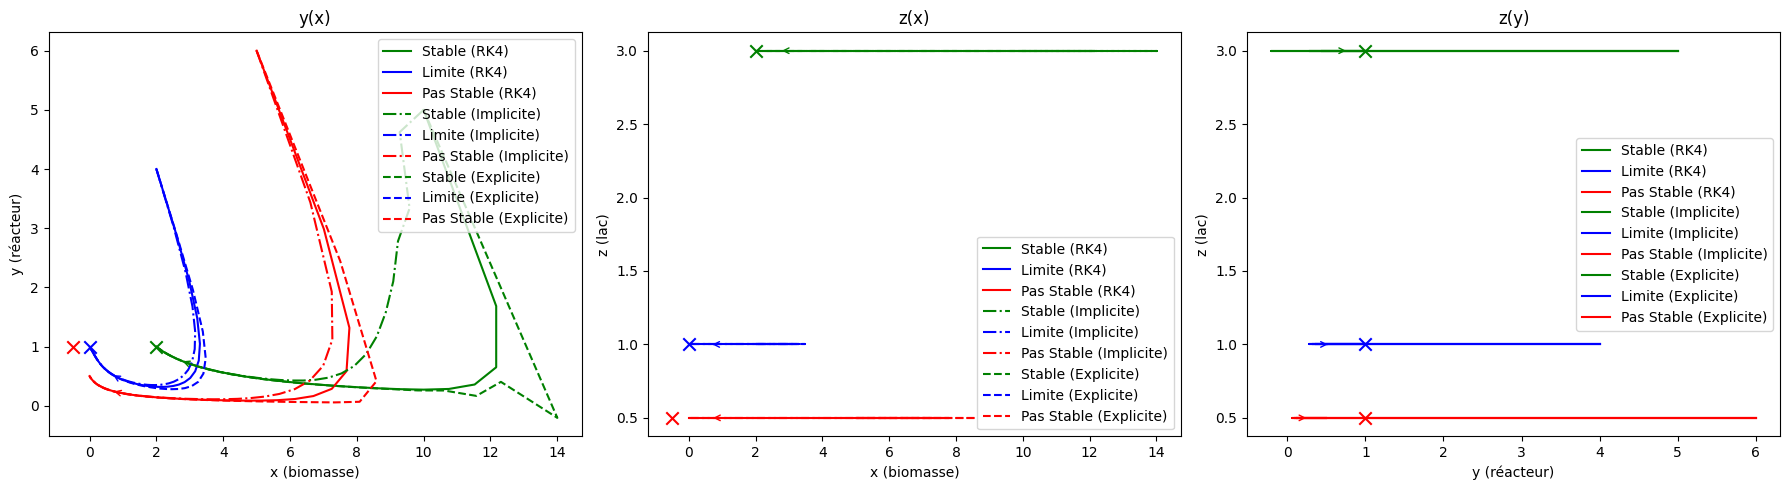

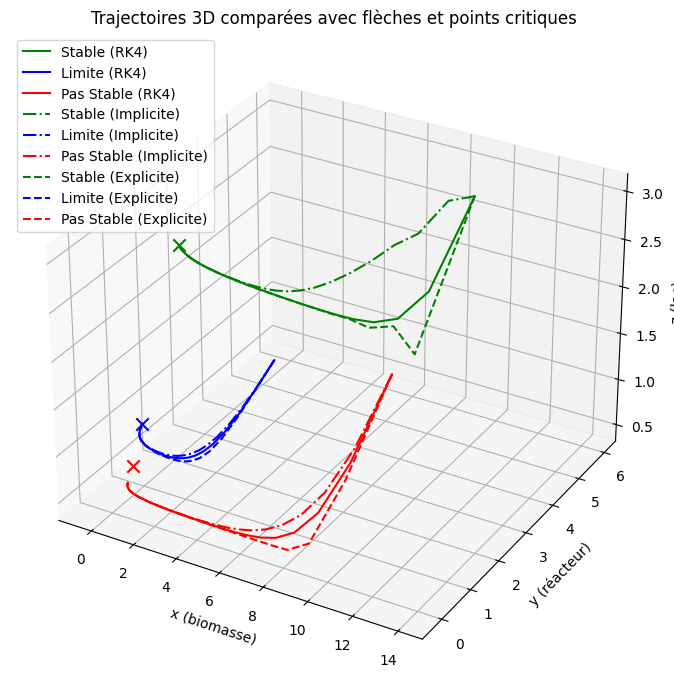

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# === Paramètres ===
mu = 1.0
Q = 1.0
epsilon = 0
t = np.linspace(0, 100, 1000)
dt = t[1] - t[0]

# === Conditions initiales ===
init_stable = np.array([10.0, 5.0, 3.0])     # µz > Q
init_limite = np.array([2, 4.0, 1.0])     # µz = Q
init_pas_stable = np.array([5, 6.0, 0.5])   # µz < Q


# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Euler explicite ===
def euler_explicit(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1] = y[i] + dt * f(t[i], y[i])
    return y

def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

def euler_implicit(f, y0, t, max_iter=10, tol=1e-6):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        yn = y[i]
        yn1 = yn.copy()
        for _ in range(max_iter):
            yn1_new = yn + dt * f(t[i+1], yn1)
            if np.linalg.norm(yn1_new - yn1) < tol:
                break
            yn1 = yn1_new
        y[i+1] = yn1
    return y

sol_stable_explicite = euler_explicit(system, init_stable, t)
sol_limite_explicite = euler_explicit(system, init_limite, t)
sol_pas_stable_explicite = euler_explicit(system, init_pas_stable, t)
sol_stable_rk4 = rk4(system, init_stable, t)
sol_limite_rk4 = rk4(system, init_limite, t)
sol_pas_stable_rk4 = rk4(system, init_pas_stable, t)
sol_stable_implicite = euler_implicit(system, init_stable, t)
sol_limite_implicite = euler_implicit(system, init_limite, t)
sol_pas_stable_implicite = euler_implicit(system,  init_pas_stable, t)

# === Points critiques ===
def point_critique(mu, Q, z0):
    return (z0 - Q/mu, Q / mu, z0)

pt_stable = point_critique(mu, Q, init_stable[2])
pt_limite = point_critique(mu, Q, init_limite[2])
pt_pas_stable = point_critique(mu, Q, init_pas_stable[2])

i_arrow = 30  # index pour position de la flèche

# === Projections 2D ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# x vs y
axes[0].plot(sol_stable_rk4[:, 0], sol_stable_rk4[:, 1], '-', color='green', label='Stable (RK4)')
axes[0].annotate('', xy=(sol_stable_rk4[i_arrow+1, 0], sol_stable_rk4[i_arrow+1, 1]),
                 xytext=(sol_stable_rk4[i_arrow, 0], sol_stable_rk4[i_arrow, 1]),
                 arrowprops=dict(arrowstyle="->", color='green'))
axes[0].plot(sol_limite_rk4[:, 0], sol_limite_rk4[:, 1], '-', color='blue', label='Limite (RK4)')
axes[0].annotate('', xy=(sol_limite_rk4[i_arrow+1, 0], sol_limite_rk4[i_arrow+1, 1]),
                 xytext=(sol_limite_rk4[i_arrow, 0], sol_limite_rk4[i_arrow, 1]),
                 arrowprops=dict(arrowstyle="->", color='blue'))
axes[0].plot(sol_pas_stable_rk4[:, 0], sol_pas_stable_rk4[:, 1], '-', color='red', label='Pas Stable (RK4)')
axes[0].annotate('', xy=(sol_pas_stable_rk4[i_arrow+1, 0], sol_pas_stable_rk4[i_arrow+1, 1]),
                 xytext=(sol_pas_stable_rk4[i_arrow, 0], sol_pas_stable_rk4[i_arrow, 1]),
                 arrowprops=dict(arrowstyle="->", color='red'))
axes[0].plot(sol_stable_implicite[:, 0], sol_stable_implicite[:, 1], '-.', color='green', label='Stable (Implicite)')
axes[0].plot(sol_limite_implicite[:, 0], sol_limite_implicite[:, 1], '-.', color='blue', label='Limite (Implicite)')
axes[0].plot(sol_pas_stable_implicite[:, 0], sol_pas_stable_implicite[:, 1], '-.', color='red', label='Pas Stable (Implicite)')
axes[0].plot(sol_stable_explicite[:, 0], sol_stable_explicite[:, 1], '--', color='green', label='Stable (Explicite)')
axes[0].plot(sol_limite_explicite[:, 0], sol_limite_explicite[:, 1], '--', color='blue', label='Limite (Explicite)')
axes[0].plot(sol_pas_stable_explicite[:, 0], sol_pas_stable_explicite[:, 1], '--', color='red', label='Pas Stable (Explicite)')
axes[0].scatter(pt_stable[0], pt_stable[1], color='green', marker='x', s=80)
axes[0].scatter(pt_limite[0], pt_limite[1], color='blue', marker='x', s=80)
axes[0].scatter(pt_pas_stable[0], pt_pas_stable[1], color='red', marker='x', s=80)
axes[0].set_xlabel('x (biomasse)')
axes[0].set_ylabel('y (réacteur)')
axes[0].set_title('y(x)')
axes[0].legend()

# z vs x
axes[1].plot(sol_stable_rk4[:, 0], sol_stable_rk4[:, 2], '-', color='green', label='Stable (RK4)')
axes[1].annotate('', xy=(sol_stable_rk4[i_arrow+1, 0], sol_stable_rk4[i_arrow+1, 2]),
                 xytext=(sol_stable_rk4[i_arrow, 0], sol_stable_rk4[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='green'))
axes[1].plot(sol_limite_rk4[:, 0], sol_limite_rk4[:, 2], '-', color='blue', label='Limite (RK4)')
axes[1].annotate('', xy=(sol_limite_rk4[i_arrow+1, 0], sol_limite_rk4[i_arrow+1, 2]),
                 xytext=(sol_limite_rk4[i_arrow, 0], sol_limite_rk4[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='blue'))
axes[1].plot(sol_pas_stable_rk4[:, 0], sol_pas_stable_rk4[:, 2], '-', color='red', label='Pas Stable (RK4)')
axes[1].annotate('', xy=(sol_pas_stable_rk4[i_arrow+1, 0], sol_pas_stable_rk4[i_arrow+1, 2]),
                 xytext=(sol_pas_stable_rk4[i_arrow, 0], sol_pas_stable_rk4[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='red'))
axes[1].plot(sol_stable_implicite[:, 0], sol_stable_implicite[:, 2], '-.', color='green', label='Stable (Implicite)')
axes[1].plot(sol_limite_implicite[:, 0], sol_limite_implicite[:, 2], '-.', color='blue', label='Limite (Implicite)')
axes[1].plot(sol_pas_stable_implicite[:, 0], sol_pas_stable_implicite[:, 2], '-.', color='red', label='Pas Stable (Implicite)')
axes[1].plot(sol_stable_explicite[:, 0], sol_stable_explicite[:, 2], '--', color='green', label='Stable (Explicite)')
axes[1].plot(sol_limite_explicite[:, 0], sol_limite_explicite[:, 2], '--', color='blue', label='Limite (Explicite)')
axes[1].plot(sol_pas_stable_explicite[:, 0], sol_pas_stable_explicite[:, 2], '--', color='red', label='Pas Stable (Explicite)')
axes[1].scatter(pt_stable[0], pt_stable[2], color='green', marker='x', s=80)
axes[1].scatter(pt_limite[0], pt_limite[2], color='blue', marker='x', s=80)
axes[1].scatter(pt_pas_stable[0], pt_pas_stable[2], color='red', marker='x', s=80)
axes[1].set_xlabel('x (biomasse)')
axes[1].set_ylabel('z (lac)')
axes[1].set_title('z(x)')
axes[1].legend()

# z vs y
axes[2].plot(sol_stable_rk4[:, 1], sol_stable_rk4[:, 2], color='green', label='Stable (RK4)')
axes[2].annotate('', xy=(sol_stable_rk4[i_arrow+1, 1], sol_stable_rk4[i_arrow+1, 2]),
                 xytext=(sol_stable_rk4[i_arrow, 1], sol_stable_rk4[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='green'))
axes[2].plot(sol_limite_rk4[:, 1], sol_limite_rk4[:, 2], color='blue', label='Limite (RK4)')
axes[2].annotate('', xy=(sol_limite_rk4[i_arrow+1, 1], sol_limite_rk4[i_arrow+1, 2]),
                 xytext=(sol_limite_rk4[i_arrow, 1], sol_limite_rk4[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='blue'))
axes[2].plot(sol_pas_stable_rk4[:, 1], sol_pas_stable_rk4[:, 2], color='red', label='Pas Stable (RK4)')
axes[2].annotate('', xy=(sol_pas_stable_rk4[i_arrow+1, 1], sol_pas_stable_rk4[i_arrow+1, 2]),
                 xytext=(sol_pas_stable_rk4[i_arrow, 1], sol_pas_stable_rk4[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='red'))
axes[2].plot(sol_stable_implicite[:, 1], sol_stable_implicite[:, 2], color='green', label='Stable (Implicite)')
axes[2].plot(sol_limite_implicite[:, 1], sol_limite_implicite[:, 2], color='blue', label='Limite (Implicite)')
axes[2].plot(sol_pas_stable_implicite[:, 1], sol_pas_stable_implicite[:, 2], color='red', label='Pas Stable (Implicite)')
axes[2].plot(sol_stable_explicite[:, 1], sol_stable_explicite[:, 2], color='green', label='Stable (Explicite)')
axes[2].plot(sol_limite_explicite[:, 1], sol_limite_explicite[:, 2], color='blue', label='Limite (Explicite)')
axes[2].plot(sol_pas_stable_explicite[:, 1], sol_pas_stable_explicite[:, 2], color='red', label='Pas Stable (Explicite)')
axes[2].scatter(pt_stable[1], pt_stable[2], color='green', marker='x', s=80)
axes[2].scatter(pt_limite[1], pt_limite[2], color='blue', marker='x', s=80)
axes[2].scatter(pt_pas_stable[1], pt_pas_stable[2], color='red', marker='x', s=80)
axes[2].set_xlabel('y (réacteur)')
axes[2].set_ylabel('z (lac)')
axes[2].set_title('z(y)')
axes[2].legend()

plt.tight_layout()
plt.show()

# === Trajectoire 3D ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol_stable_rk4[:, 0], sol_stable_rk4[:, 1], sol_stable_rk4[:, 2], label='Stable (RK4)', linestyle = '-', color='green')
ax.plot(sol_limite_rk4[:, 0], sol_limite_rk4[:, 1], sol_limite_rk4[:, 2], label='Limite (RK4)', linestyle = '-', color='blue')
ax.plot(sol_pas_stable_rk4[:, 0], sol_pas_stable_rk4[:, 1], sol_pas_stable_rk4[:, 2], label='Pas Stable (RK4)', linestyle = '-', color='red')
ax.plot(sol_stable_implicite[:, 0], sol_stable_implicite[:, 1], sol_stable_implicite[:, 2], label='Stable (Implicite)', linestyle = '-.', color='green')
ax.plot(sol_limite_implicite[:, 0], sol_limite_implicite[:, 1], sol_limite_implicite[:, 2], label='Limite (Implicite)', linestyle = '-.', color='blue')
ax.plot(sol_pas_stable_implicite[:, 0], sol_pas_stable_implicite[:, 1], sol_pas_stable_implicite[:, 2], label='Pas Stable (Implicite)', linestyle = '-.', color='red')
ax.plot(sol_stable_explicite[:, 0], sol_stable_explicite[:, 1], sol_stable_explicite[:, 2], label='Stable (Explicite)', linestyle = '--', color='green')
ax.plot(sol_limite_explicite[:, 0], sol_limite_explicite[:, 1], sol_limite_explicite[:, 2], label='Limite (Explicite)', linestyle = '--', color='blue')
ax.plot(sol_pas_stable_explicite[:, 0], sol_pas_stable_explicite[:, 1], sol_pas_stable_explicite[:, 2], label='Pas Stable (Explicite)', linestyle = '--', color='red')

# Points critiques
ax.scatter(*pt_stable, color='green', marker='x', s=80)
ax.scatter(*pt_limite, color='blue', marker='x', s=80)
ax.scatter(*pt_pas_stable, color='red', marker='x', s=80)

# Flèche 3D sur cas limite
dx = sol_limite_rk4[i_arrow+1, 0] - sol_limite_rk4[i_arrow, 0]
dy = sol_limite_rk4[i_arrow+1, 1] - sol_limite_rk4[i_arrow, 1]
dz = sol_limite_rk4[i_arrow+1, 2] - sol_limite_rk4[i_arrow, 2]
ax.quiver(sol_limite_rk4[i_arrow, 0], sol_limite_rk4[i_arrow, 1], sol_limite_rk4[i_arrow, 2],
          dx, dy, dz, color='black', arrow_length_ratio=0.1)

ax.set_xlabel('x (biomasse)')
ax.set_ylabel('y (réacteur)')
ax.set_zlabel('z (lac)')
ax.set_title('Trajectoires 3D comparées avec flèches et points critiques')
ax.legend()
plt.tight_layout()
plt.show()



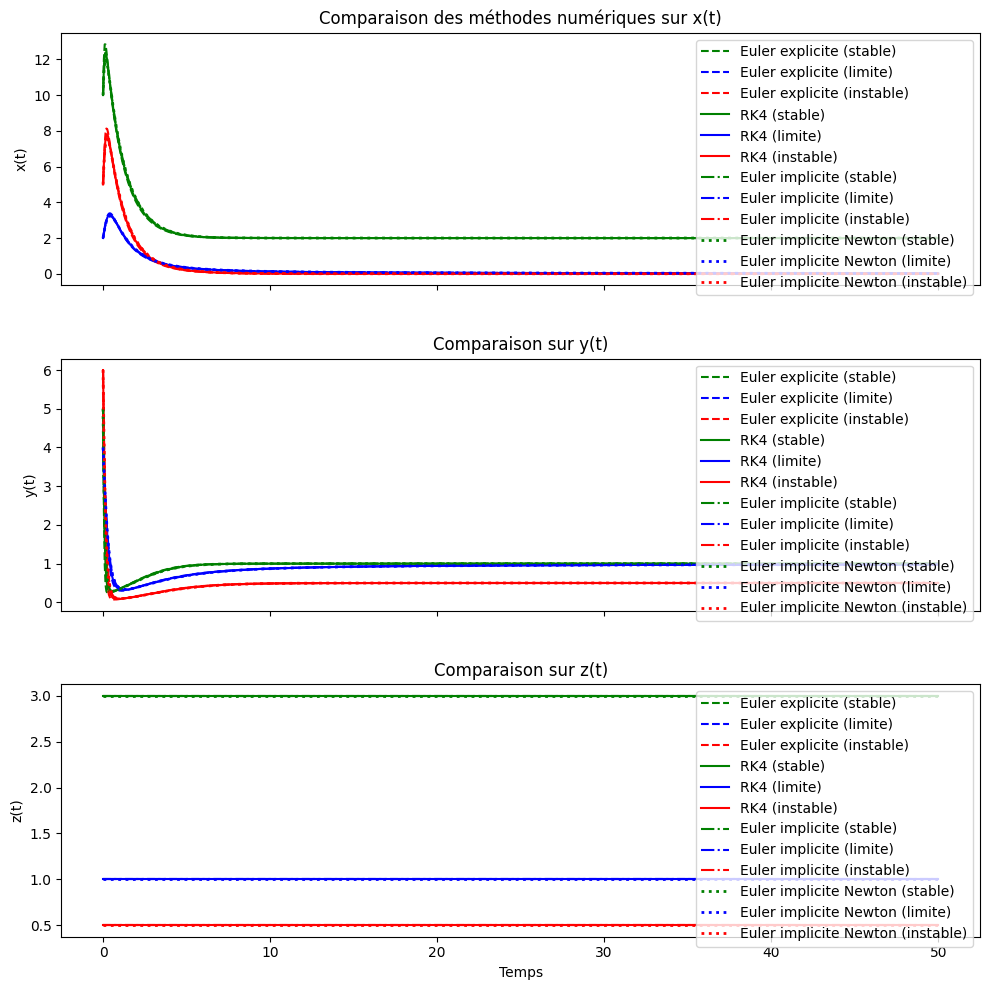

In [14]:
from scipy.optimize import root

# === Paramètres ===
mu = 1.0
Q = 1.0
epsilon = 0
t = np.linspace(0, 50, 1000)
dt = t[1] - t[0]

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Euler explicite ===
def euler_explicit(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1] = y[i] + dt * f(t[i], y[i])
    return y

# === Euler implicite (point fixe) ===
def euler_implicit(f, y0, t, max_iter=10, tol=1e-6):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        yn = y[i]
        yn1 = yn.copy()
        for _ in range(max_iter):
            yn1_new = yn + dt * f(t[i+1], yn1)
            if np.linalg.norm(yn1_new - yn1) < tol:
                break
            yn1 = yn1_new
        y[i+1] = yn1
    return y

# === Euler implicite avec Newton-Raphson ===
def f_system(state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

def jacobian(state):
    x, y, z = state
    return np.array([
        [mu * y - Q, mu * x, 0],
        [-mu * y, -mu * x - Q, Q],
        [0, epsilon * Q, -epsilon * Q]
    ])

def euler_implicit_newton(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        yn = y[i]
        def g(y_next):
            return y_next - yn - dt * f(y_next)
        def J(y_next):
            return np.eye(3) - dt * jacobian(y_next)
        sol = root(g, yn, jac=J, method='hybr')
        y[i+1] = sol.x
    return y


sol_stable_explicite = euler_explicit(system, init_stable, t)
sol_limite_explicite = euler_explicit(system, init_limite, t)
sol_pas_stable_explicite = euler_explicit(system,  init_pas_stable, t)
sol_stable_rk4 = rk4(system, init_stable, t)
sol_limite_rk4 = rk4(system, init_limite, t)
sol_pas_stable_rk4 = rk4(system, init_pas_stable, t)
sol_stable_implicite = euler_implicit(system, init_stable, t)
sol_limite_implicite = euler_implicit(system, init_limite, t)
sol_pas_stable_implicite = euler_implicit(system,  init_pas_stable, t)
sol_stable_newton= euler_implicit_newton(f_system, init_stable, t)
sol_pas_stable_newton = euler_implicit_newton(f_system, init_pas_stable, t)
sol_limite_newton = euler_implicit_newton(f_system,init_limite, t)


# === Tracé comparatif ===
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# x(t)
axes[0].plot(t, sol_stable_explicite[:, 0], label="Euler explicite (stable)", linestyle='--', color='green')
axes[0].plot(t, sol_limite_explicite[:, 0], label="Euler explicite (limite)", linestyle='--', color='blue')
axes[0].plot(t, sol_pas_stable_explicite[:, 0], label="Euler explicite (instable)", linestyle='--', color='red')
axes[0].plot(t, sol_stable_rk4[:, 0], label="RK4 (stable)", linestyle='-', color='green')
axes[0].plot(t, sol_limite_rk4[:, 0], label="RK4 (limite)", linestyle='-', color='blue')
axes[0].plot(t, sol_pas_stable_rk4[:, 0], label="RK4 (instable)", linestyle='-', color='red')
axes[0].plot(t, sol_stable_implicite[:, 0], label="Euler implicite (stable)", linestyle='-.', color='green')
axes[0].plot(t, sol_limite_implicite[:, 0], label="Euler implicite (limite)", linestyle='-.', color='blue')
axes[0].plot(t, sol_pas_stable_implicite[:, 0], label="Euler implicite (instable)", linestyle='-.', color='red')
axes[0].plot(t, sol_stable_newton[:, 0], label="Euler implicite Newton (stable)", linewidth=2, linestyle=':', color='green')
axes[0].plot(t, sol_limite_newton[:, 0], label="Euler implicite Newton (limite)", linewidth=2, linestyle=':', color='blue')
axes[0].plot(t, sol_pas_stable_newton[:, 0], label="Euler implicite Newton (instable)", linewidth=2, linestyle=':', color='red')
axes[0].set_ylabel('x(t)')
axes[0].legend()
axes[0].set_title('Comparaison des méthodes numériques sur x(t)')

# y(t)
axes[1].plot(t, sol_stable_explicite[:, 1], label="Euler explicite (stable)", linestyle='--', color='green')
axes[1].plot(t, sol_limite_explicite[:, 1], label="Euler explicite (limite)", linestyle='--', color='blue')
axes[1].plot(t, sol_pas_stable_explicite[:, 1], label="Euler explicite (instable)", linestyle='--', color='red')
axes[1].plot(t, sol_stable_rk4[:, 1], label="RK4 (stable)", linestyle='-', color='green')
axes[1].plot(t, sol_limite_rk4[:, 1], label="RK4 (limite)", linestyle='-', color='blue')
axes[1].plot(t, sol_pas_stable_rk4[:, 1], label="RK4 (instable)", linestyle='-', color='red')
axes[1].plot(t, sol_stable_implicite[:, 1], label="Euler implicite (stable)", linestyle='-.', color='green')
axes[1].plot(t, sol_limite_implicite[:, 1], label="Euler implicite (limite)", linestyle='-.', color='blue')
axes[1].plot(t, sol_pas_stable_implicite[:, 1], label="Euler implicite (instable)", linestyle='-.', color='red')
axes[1].plot(t, sol_stable_newton[:, 1], label="Euler implicite Newton (stable)", linewidth=2, linestyle=':', color='green')
axes[1].plot(t, sol_limite_newton[:, 1], label="Euler implicite Newton (limite)", linewidth=2, linestyle=':', color='blue')
axes[1].plot(t, sol_pas_stable_newton[:, 1], label="Euler implicite Newton (instable)", linewidth=2, linestyle=':', color='red')
axes[1].set_ylabel('y(t)')
axes[1].legend()
axes[1].set_title('Comparaison sur y(t)')

# z(t)
axes[2].plot(t, sol_stable_explicite[:, 2], label="Euler explicite (stable)", linestyle='--', color='green')
axes[2].plot(t, sol_limite_explicite[:, 2], label="Euler explicite (limite)", linestyle='--', color='blue')
axes[2].plot(t, sol_pas_stable_explicite[:, 2], label="Euler explicite (instable)", linestyle='--', color='red')
axes[2].plot(t, sol_stable_rk4[:, 2], label="RK4 (stable)", linestyle='-', color='green')
axes[2].plot(t, sol_limite_rk4[:, 2], label="RK4 (limite)", linestyle='-', color='blue')
axes[2].plot(t, sol_pas_stable_rk4[:, 2], label="RK4 (instable)", linestyle='-', color='red')
axes[2].plot(t, sol_stable_implicite[:, 2], label="Euler implicite (stable)", linestyle='-.', color='green')
axes[2].plot(t, sol_limite_implicite[:, 2], label="Euler implicite (limite)", linestyle='-.', color='blue')
axes[2].plot(t, sol_pas_stable_implicite[:, 2], label="Euler implicite (instable)", linestyle='-.', color='red')
axes[2].plot(t, sol_stable_newton[:, 2], label="Euler implicite Newton (stable)", linewidth=2, linestyle=':', color='green')
axes[2].plot(t, sol_limite_newton[:, 2], label="Euler implicite Newton (limite)", linewidth=2, linestyle=':', color='blue')
axes[2].plot(t, sol_pas_stable_newton[:, 2], label="Euler implicite Newton (instable)", linewidth=2, linestyle=':', color='red')
axes[2].set_xlabel('Temps')
axes[2].set_ylabel('z(t)')
axes[2].set_title('Comparaison sur z(t)')
axes[2].legend()

plt.tight_layout()
plt.show()
